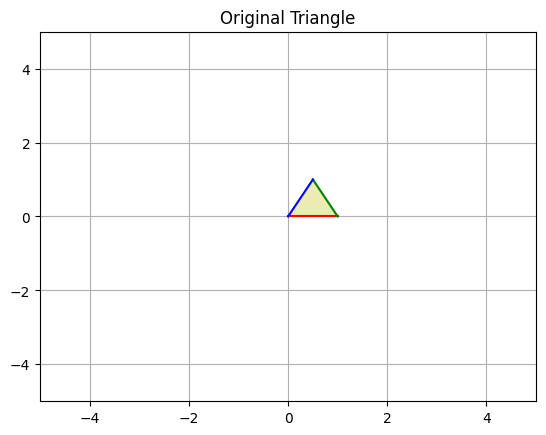

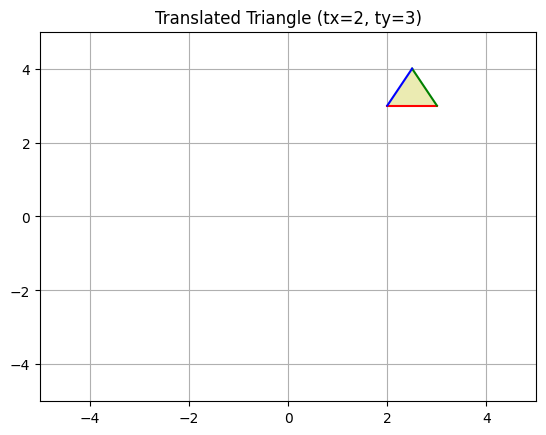

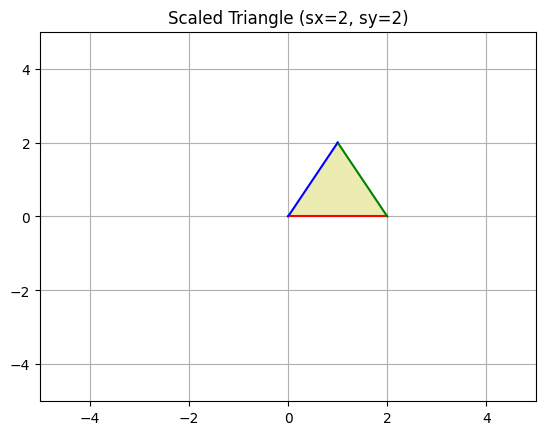

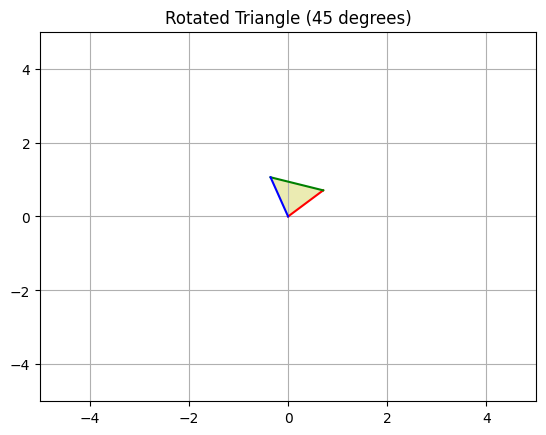

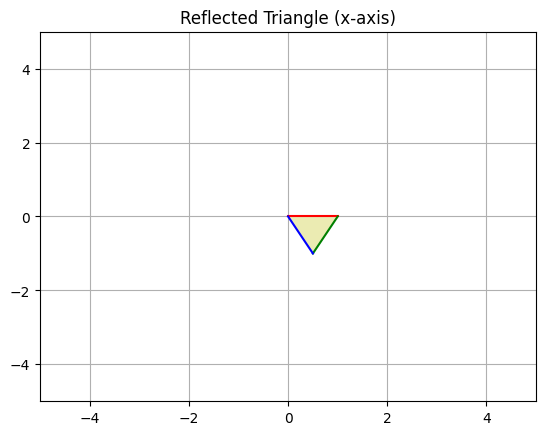

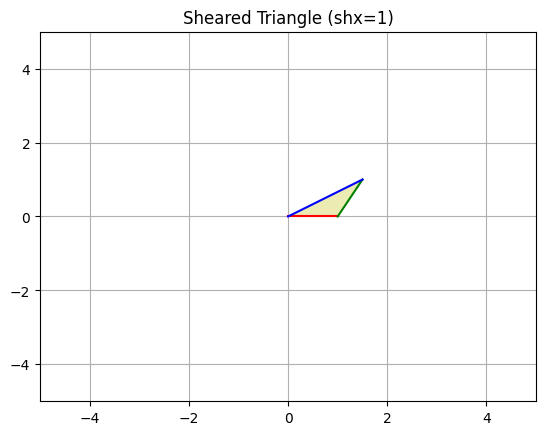

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

triangle = np.array([[0, 0], [1, 0], [0.5, 1]])

# Function to plot the triangle
def plot_triangle(triangle, title):
    plt.figure()
    plt.plot([triangle[0, 0], triangle[1, 0]], [triangle[0, 1], triangle[1, 1]], 'r-')
    plt.plot([triangle[1, 0], triangle[2, 0]], [triangle[1, 1], triangle[2, 1]], 'g-')
    plt.plot([triangle[2, 0], triangle[0, 0]], [triangle[2, 1], triangle[0, 1]], 'b-')
    plt.fill(triangle[:, 0], triangle[:, 1], 'y', alpha=0.3)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid(True)
    plt.title(title)
    plt.show()

# Translation
def translate(triangle, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    triangle_h = np.hstack((triangle, np.ones((triangle.shape[0], 1))))  # Homogeneous coords
    transformed = triangle_h.dot(translation_matrix.T)[:, :-1]  # Apply transform and return to 2D
    return transformed

# Scaling
def scale(triangle, sx, sy):
    scaling_matrix = np.array([[sx, 0],
                               [0, sy]])
    transformed = triangle.dot(scaling_matrix.T)
    return transformed

# Rotation
def rotate(triangle, angle):
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    transformed = triangle.dot(rotation_matrix.T)
    return transformed

# Reflection (x-axis reflection)
def reflect(triangle, axis='x'):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0], [0, -1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0], [0, 1]])
    transformed = triangle.dot(reflection_matrix.T)
    return transformed

# Shearing (x-axis)
def shear(triangle, shx, shy):
    shearing_matrix = np.array([[1, shx], [shy, 1]])
    transformed = triangle.dot(shearing_matrix.T)
    return transformed

# Example Transformations
translated_triangle = translate(triangle, 2, 3)
scaled_triangle = scale(triangle, 2, 2)
rotated_triangle = rotate(triangle, 45)
reflected_triangle = reflect(triangle, axis='x')
sheared_triangle = shear(triangle, 1, 0)

# Plotting the transformations
plot_triangle(triangle, "Original Triangle")
plot_triangle(translated_triangle, "Translated Triangle (tx=2, ty=3)")
plot_triangle(scaled_triangle, "Scaled Triangle (sx=2, sy=2)")
plot_triangle(rotated_triangle, "Rotated Triangle (45 degrees)")
plot_triangle(reflected_triangle, "Reflected Triangle (x-axis)")
plot_triangle(sheared_triangle, "Sheared Triangle (shx=1)")

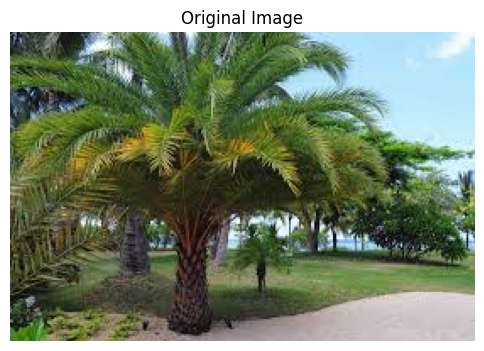

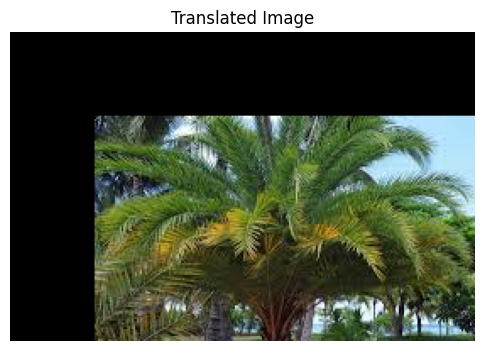

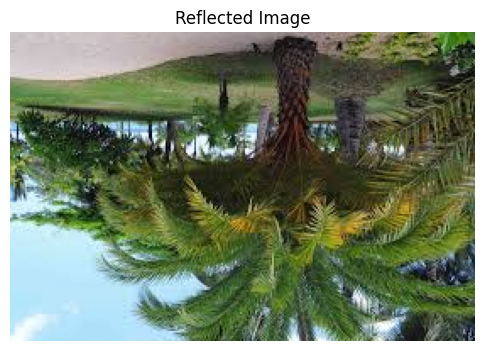

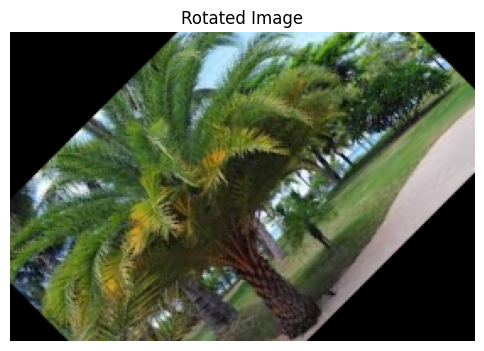

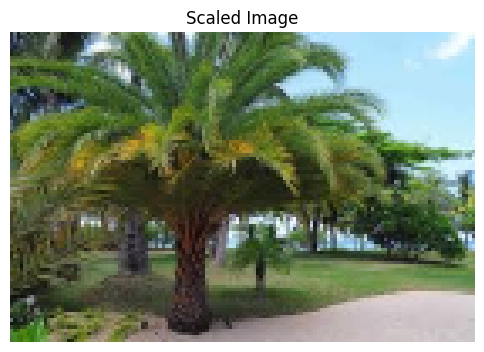

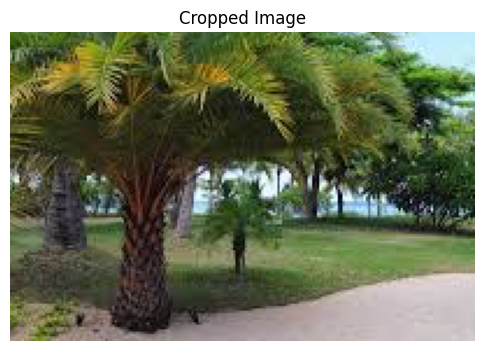

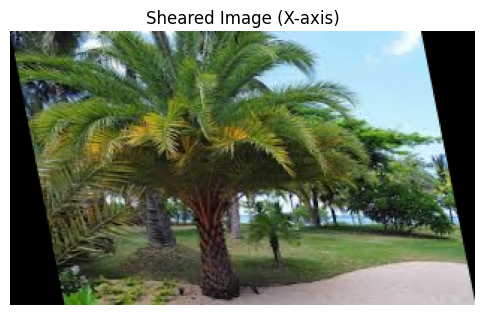

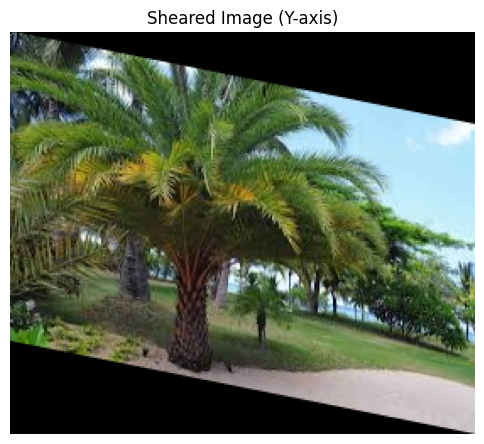

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/Unknown')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def display_image(title, img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))
    return translated_img


def reflect_image(img, axis):
    if axis == 'x':
        reflected_img = cv2.flip(img, 0)  # Vertical flip
    elif axis == 'y':
        reflected_img = cv2.flip(img, 1)  # Horizontal flip
    elif axis == 'both':
        reflected_img = cv2.flip(img, -1)  # Flip both vertically and horizontally
    return reflected_img

def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img


def scale_image(img, fx, fy):
    scaled_img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_img


def crop_image(img, start_x, start_y, width, height):
    cropped_img = img[start_y:start_y + height, start_x:start_x + width]
    return cropped_img

def shear_image_x(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_img_x = cv2.warpAffine(img, shear_matrix, (cols + int(shear_factor * rows), rows))
    return sheared_img_x

def shear_image_y(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_img_y = cv2.warpAffine(img, shear_matrix, (cols, rows + int(shear_factor * cols)))
    return sheared_img_y

translated = translate_image(image, 50, 50)
reflected = reflect_image(image, 'both')
rotated = rotate_image(image, 45)
scaled = scale_image(image, 0.5, 0.5)
cropped = crop_image(image, 50, 50, 200, 200)
sheared_x = shear_image_x(image, 0.2)
sheared_y = shear_image_y(image, 0.2)


display_image("Original Image", image)
display_image("Translated Image", translated)
display_image("Reflected Image", reflected)
display_image("Rotated Image", rotated)
display_image("Scaled Image", scaled)
display_image("Cropped Image", cropped)
display_image("Sheared Image (X-axis)", sheared_x)
display_image("Sheared Image (Y-axis)", sheared_y)